<a href="https://colab.research.google.com/github/NidaNabi/embedding-new-datapoints-in-existing-t-SNE/blob/main/TSNE_PointUpdates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#tsne on mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/My Drive/Colab Notebooks/train.csv"
df=pd.read_csv(path)


In [ ]:
print(df.head(4))


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  

[4 rows

In [ ]:
l=df['label']
d = df.drop("label", axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
 
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

(42000, 784)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


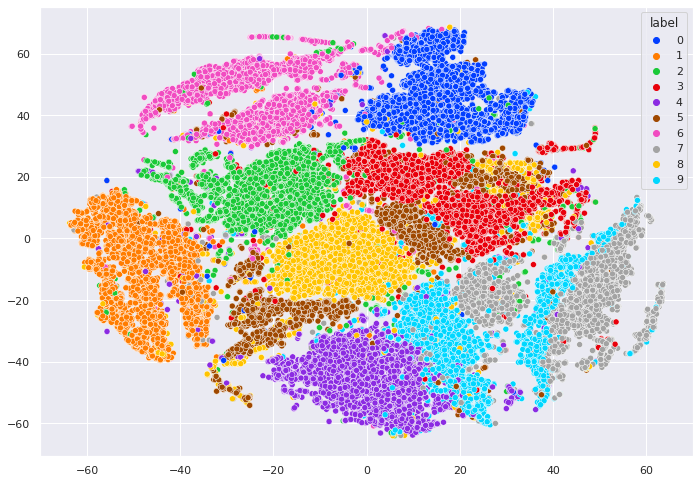

In [ ]:

from sklearn.manifold import TSNE
import seaborn as sn

model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(standardized_data)
tsne_data = np.vstack((tsne_data.T, l)).T

sn.set(rc={'figure.figsize':(11.7,8.27)})
palette = sn.color_palette("bright", 10)
sn.scatterplot(tsne_data[:,0], tsne_data[:,1], hue=l, legend='full', palette=palette)

In [ ]:
pip install opentsne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 27.2 MB/s eta 0:00:00


In [ ]:
from openTSNE import TSNE
import seaborn as sns
from sklearn.model_selection import train_test_split
from openTSNE import TSNEEmbedding
from openTSNE import affinity
from openTSNE import initialization


In [ ]:
l=l.to_numpy()
d=d.to_numpy()


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(d,l,test_size=0.3)

In [ ]:
%%time
affinities_train = affinity.PerplexityBasedNN(
    x_train,
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 94.36 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 2.61 seconds
CPU times: user 2min 14s, sys: 1.19 s, total: 2min 15s
Wall time: 1min 36s


In [ ]:
%time init_train = initialization.pca(x_train, random_state=42)

CPU times: user 2.96 s, sys: 1.79 s, total: 4.76 s
Wall time: 2.55 s


In [ ]:
embedding_train = TSNEEmbedding(
    init_train,
    affinities_train,
    negative_gradient_method="fft",
    n_jobs=8,
    verbose=True,
)

In [ ]:
%time embedding_train_1 = embedding_train.optimize(n_iter=250, exaggeration=12, momentum=0.5)

===> Running optimization with exaggeration=12.00, lr=2450.00 for 250 iterations...
Iteration   50, KL divergence 5.8863, 50 iterations in 3.7994 sec
Iteration  100, KL divergence 5.4402, 50 iterations in 3.2729 sec
Iteration  150, KL divergence 5.3545, 50 iterations in 3.2973 sec
Iteration  200, KL divergence 5.3236, 50 iterations in 3.2363 sec
Iteration  250, KL divergence 5.3091, 50 iterations in 3.2506 sec
   --> Time elapsed: 16.86 seconds
CPU times: user 25 s, sys: 275 ms, total: 25.2 s
Wall time: 17 s


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


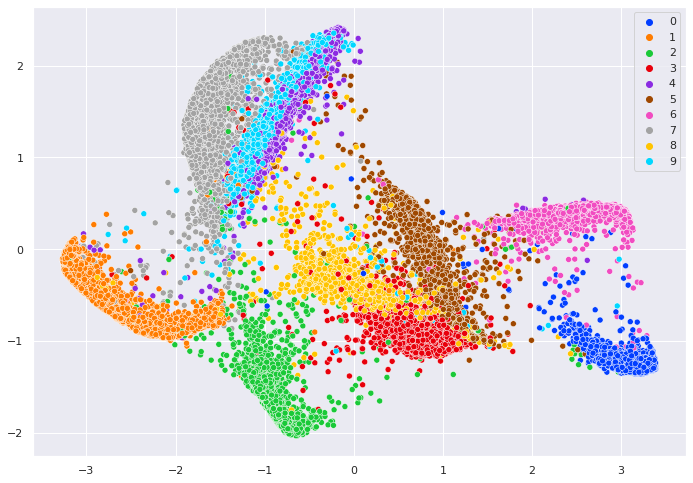

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_train_1[:,0], embedding_train_1[:,1], hue=y_train, legend='full', palette=palette)


In [ ]:
%time embedding_train_2 = embedding_train_1.optimize(n_iter=500, momentum=0.8)

===> Running optimization with exaggeration=1.00, lr=2450.00 for 500 iterations...
Iteration   50, KL divergence 3.6367, 50 iterations in 3.2647 sec
Iteration  100, KL divergence 3.1616, 50 iterations in 3.2195 sec
Iteration  150, KL divergence 2.9257, 50 iterations in 3.6537 sec
Iteration  200, KL divergence 2.7770, 50 iterations in 4.5976 sec
Iteration  250, KL divergence 2.6732, 50 iterations in 5.6732 sec
Iteration  300, KL divergence 2.5975, 50 iterations in 6.9952 sec
Iteration  350, KL divergence 2.5406, 50 iterations in 8.4791 sec
Iteration  400, KL divergence 2.4975, 50 iterations in 13.2853 sec
Iteration  450, KL divergence 2.4642, 50 iterations in 11.1264 sec
Iteration  500, KL divergence 2.4373, 50 iterations in 12.6872 sec
   --> Time elapsed: 73.00 seconds
CPU times: user 1min 27s, sys: 1.3 s, total: 1min 28s
Wall time: 1min 13s


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


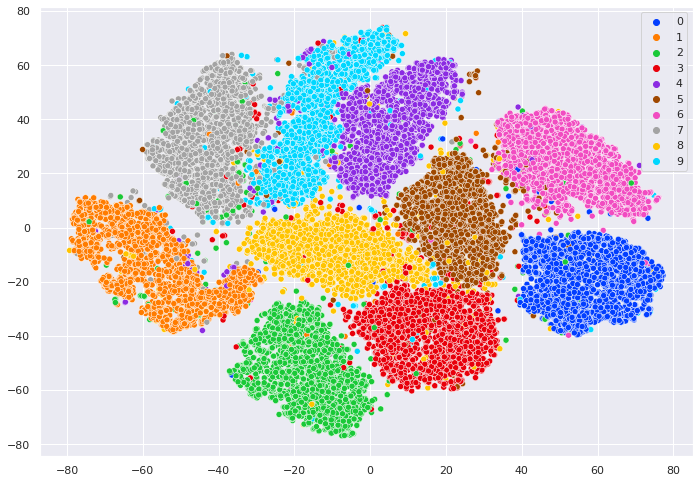

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_train_2[:,0], embedding_train_2[:,1], hue=y_train, legend='full', palette=palette)

In [ ]:
%%time
embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 12.38 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.17 seconds
CPU times: user 23 s, sys: 462 ms, total: 23.5 s
Wall time: 12.6 s


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


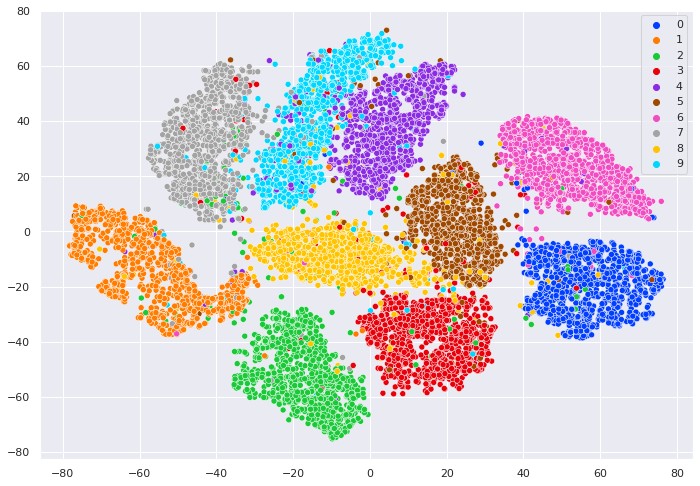

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_test[:,0], embedding_test[:,1], hue=y_test, legend='full', palette=palette)

In [ ]:
%time embedding_test_1 = embedding_test.optimize(n_iter=250, learning_rate=0.1, momentum=0.8)

===> Running optimization with exaggeration=1.00, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 173691.4296, 50 iterations in 0.4152 sec
Iteration  100, KL divergence 171528.4249, 50 iterations in 0.4584 sec
Iteration  150, KL divergence 170575.7381, 50 iterations in 0.4552 sec
Iteration  200, KL divergence 169980.4995, 50 iterations in 0.4862 sec
Iteration  250, KL divergence 169541.9831, 50 iterations in 0.4574 sec
   --> Time elapsed: 2.28 seconds
CPU times: user 3.09 s, sys: 156 ms, total: 3.24 s
Wall time: 2.74 s


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


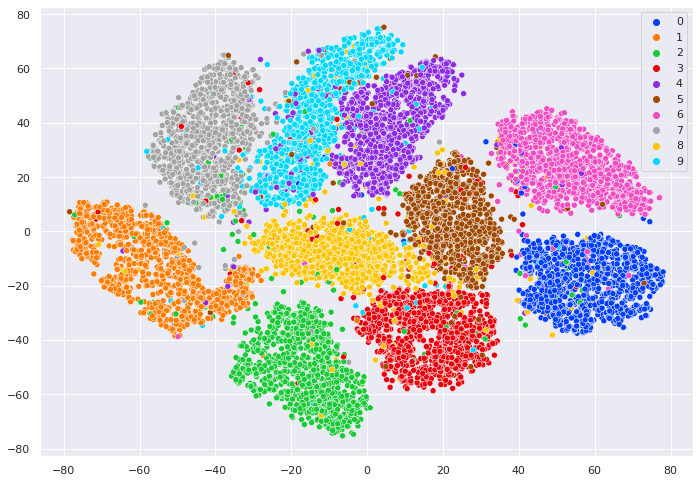

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_test_1[:,0], embedding_test_1[:,1], hue=y_test, legend='full', palette=palette)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


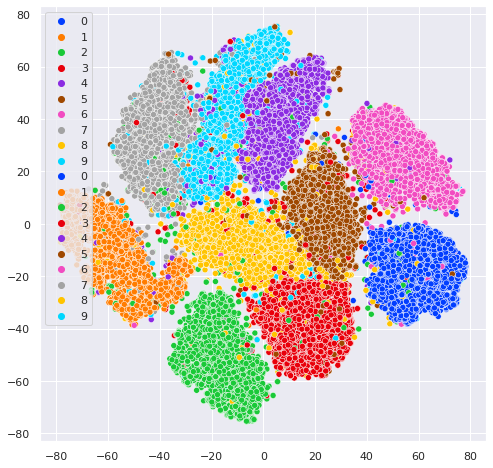

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_train_2[:,0], embedding_train_2[:,1], hue=y_train, legend='full', palette=palette)
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_test_1[:,0], embedding_test_1[:,1], hue=y_test, legend='full', palette=palette)

In [ ]:
from sklearn.cluster import KMeans
kmeans_tsne_embedding=KMeans(n_clusters=10,n_init=100,max_iter=400,init='k-means++',random_state=42).fit(embedding_train_2)
label1=kmeans_tsne_embedding.fit_predict(x_test)

In [ ]:

kmeans_tsne=KMeans(n_clusters=10,n_init=100,max_iter=400,init='k-means++',random_state=42).fit(embedding_test_1)
label2=kmeans_tsne_embedding.fit_predict(x_test)

In [ ]:
from sklearn.metrics import silhouette_score
print("kmeans tsne scaled silhouette score: {}".format(silhouette_score(embedding_test_1,kmeans_tsne.labels_,metric='euclidean')))

kmeans tsne scaled silhouette score: 0.45201431208320014


In [ ]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(label1,label2,average_method='arithmetic')

1.0